<br>
<img src="data/airbnb_logo.png" alt="Logo de Airbnb" style="width:300px"/><br>

# **Airbnb Case**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: ggalvanjorge@gmail.com

---
## **Agregación de datos y búsqueda de insights**

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura del dataset
df_listings = pd.read_csv('./data/listings_clean.csv')
df_listings = df_listings.drop('Unnamed: 0', axis='columns') # Eliminación de la columna 'Unnamed: 0'

### **1 - Estadísticas por tipo de habitación**

#### 1.1 - Precio y puntuación máxima, mínima y media según el tipo de habitación

In [3]:
# Estadísticas del precio y de las puntuaciones tras agrupar por tipo de habitación
round(df_listings[['price','review_scores_rating']].groupby(df_listings['room_type']).agg(['max','min','mean']), 2)

price               review_scores_rating            
                   max   min    mean                  max   min  mean
room_type                                                            
Entire home/apt  449.0  15.0  216.11                  5.0  2.00  4.85
Hotel room       419.0  82.0  230.98                  5.0  4.21  4.73
Private room     449.0  25.0  156.21                  5.0  3.00  4.76
Shared room      425.0  57.0  116.97                  5.0  4.00  4.60

### **2 - Representación de barrios más caros y baratos**

#### 2.1 - Barrios con el precio medio más caro

In [4]:
# Barrios con el precio medio más caro
df_neighbourhood_expensive = round(df_listings['price'].groupby(df_listings['neighbourhood_cleansed']).agg('mean'), 2)
df_neighbourhood_expensive = df_neighbourhood_expensive.reset_index().sort_values(by='price', ascending=False)
df_neighbourhood_expensive = df_neighbourhood_expensive.head(5)
df_neighbourhood_expensive

,neighbourhood_cleansed,price
4,Centrum-Oost,218.41
21,Zuid,216.94
5,Centrum-West,215.04
8,De Pijp - Rivierenbuurt,214.53
3,Buitenveldert - Zuidas,204.57


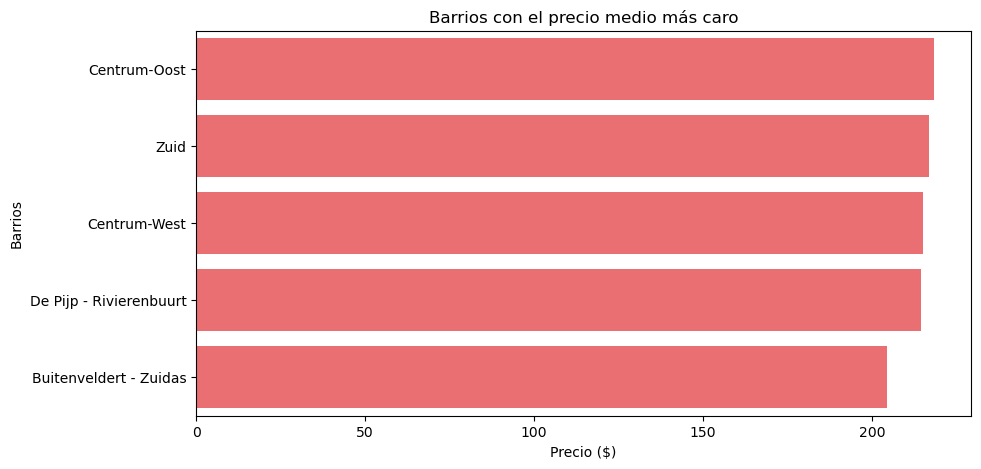

In [5]:
# Gráfico de barras con los barrios más caros
plt.figure(figsize = (10,5)) # Ajuste del tamaño del gráfico
sns.barplot(x='price', y='neighbourhood_cleansed', data=df_neighbourhood_expensive, color='#FF5A5F')

# Título y etiquetas de los ejes
plt.title('Barrios con el precio medio más caro')
plt.xlabel('Precio ($)')
plt.ylabel('Barrios')

plt.show()

#### 2.2 - Barrios con el precio medio más barato

In [6]:
# Barrios con el precio medio más barato
df_neighbourhood_cheap = round(df_listings['price'].groupby(df_listings['neighbourhood_cleansed']).agg('mean'), 2)
df_neighbourhood_cheap = df_neighbourhood_cheap.reset_index().sort_values(by='price', ascending=True)
df_neighbourhood_cheap = df_neighbourhood_cheap.head(5)
df_neighbourhood_cheap

,neighbourhood_cleansed,price
9,Gaasperdam - Driemond,136.03
1,Bijlmer-Oost,144.60
0,Bijlmer-Centrum,147.66
12,Noord-Oost,147.66
15,Osdorp,149.39


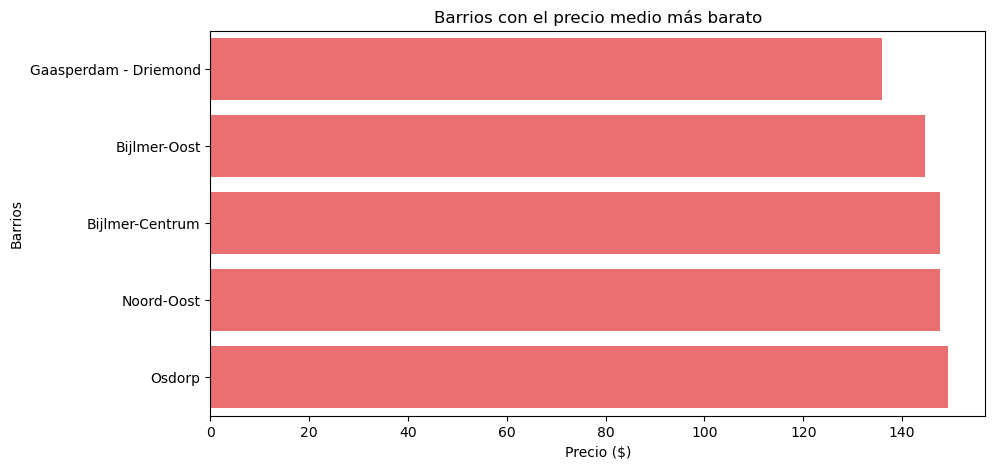

In [7]:
# Gráfico de barras con los barrios más caros
plt.figure(figsize = (10,5)) # Ajuste del tamaño del gráfico
sns.barplot(x='price', y='neighbourhood_cleansed', data=df_neighbourhood_cheap, color='#FF5A5F')

# Título y etiquetas de los ejes
plt.title('Barrios con el precio medio más barato')
plt.xlabel('Precio ($)')
plt.ylabel('Barrios')

plt.show()

### **3 - Distribución de oferta por barrios**

#### 3.1 - Barrios con mayor oferta

In [8]:
# Lista con los 5 barrios con más oferta
list_top5_neighbourhood = df_listings['neighbourhood_cleansed'].value_counts().head()
list_top5_neighbourhood = list_top5_neighbourhood.index.tolist()

In [9]:
# Condición para incluir sólo los registros de los barrios con más oferta
cond = df_listings['neighbourhood_cleansed'].isin(list_top5_neighbourhood)
df_top5_neighbourhood = df_listings[cond]

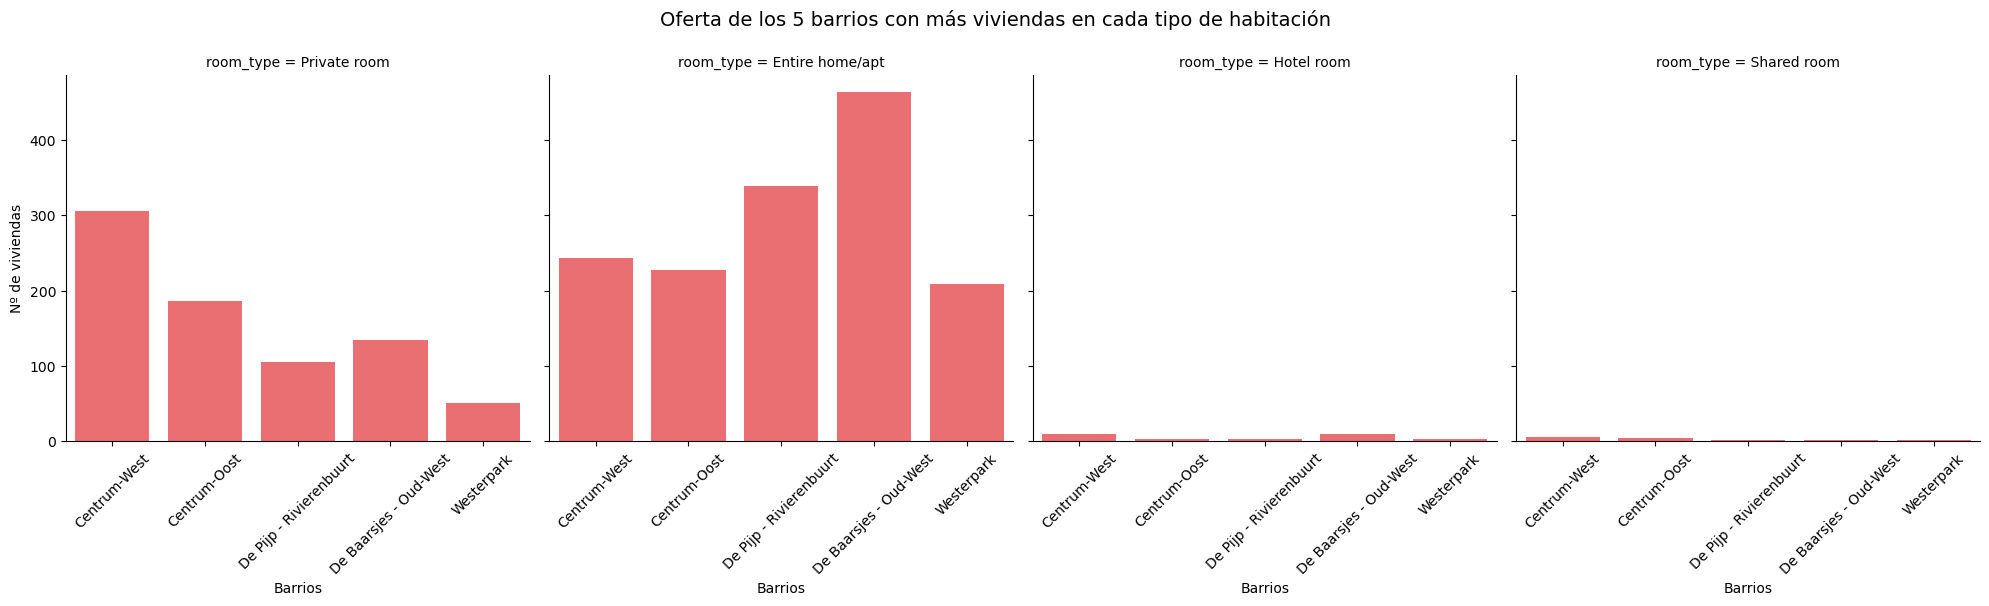

In [10]:
# Gráficos de barras con la oferta de los 5 barrios con más viviendas en cada tipo de habitación
fig = sns.catplot(x='neighbourhood_cleansed', col='room_type', data=df_top5_neighbourhood, kind='count', color='#FF5A5F')

# Título del gráfico
plt.subplots_adjust(top=0.85) # Ajuste de la posición del título para evitar superposiciones
fig.fig.suptitle('Oferta de los 5 barrios con más viviendas en cada tipo de habitación', fontsize=14)

# Etiquetas de los ejes
fig.set_axis_labels("Barrios", "Nº de viviendas")
fig.set_xticklabels(rotation=45)

plt.show()

### **4 - Análisis del precio de los barrios según su latitud**

#### 4.1 - Precio y latitud media de los barrios 

In [11]:
# Latitud y precio medio de los barrios de Ámsterdam
df_neighborhoods_north = df_listings[['latitude','price']].groupby(df_listings['neighbourhood_cleansed']).agg('mean')
df_neighborhoods_north = df_neighborhoods_north.reset_index().sort_values(by='latitude', ascending=False)
df_neighborhoods_north

,neighbourhood_cleansed,latitude,price
13,Noord-West,52.415659,164.587413
12,Noord-Oost,52.413160,147.664234
16,Oud-Noord,52.391101,180.256983
20,Westerpark,52.383538,204.488636
10,Geuzenveld - Slotermeer,52.381098,180.971014
2,Bos en Lommer,52.379198,178.191257
5,Centrum-West,52.375665,215.039076
14,Oostelijk Havengebied - Indische Buurt,52.367557,176.815603
7,De Baarsjes - Oud-West,52.366286,203.618033
4,Centrum-Oost,52.365977,218.407143


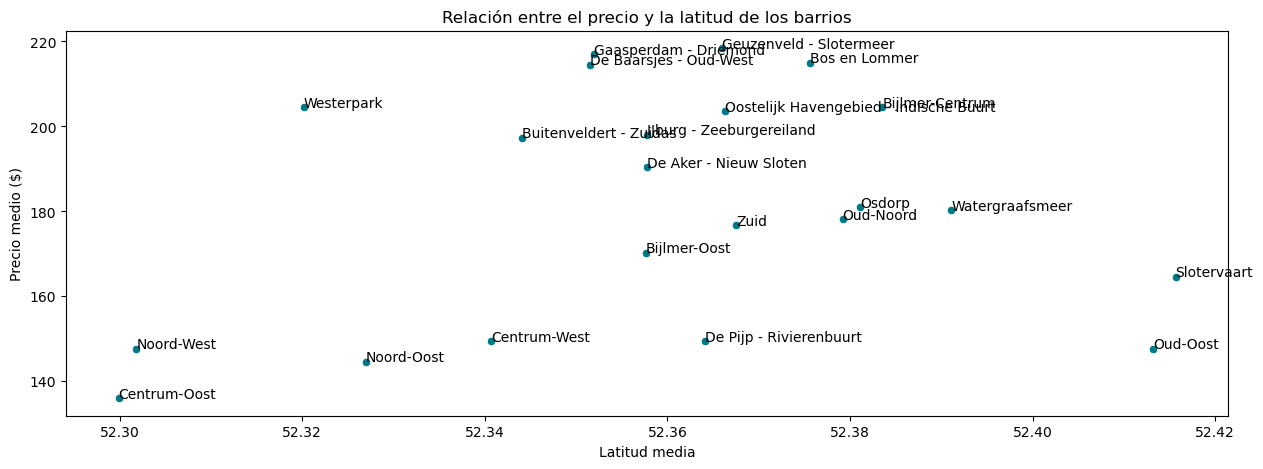

In [12]:
# Gráfico de dispersión con la relación entre el precio y la latitud
fig, ax = plt.subplots(figsize = (15,5)) # Ajuste del tamaño del gráfico
sns.scatterplot(x='latitude', y='price', data=df_neighborhoods_north, color='#007A87')

n = df_neighborhoods_north['neighbourhood_cleansed']

# Bucle para agregar el barrio al que corresponde cada punto
for i, txt in enumerate(n):
    ax.annotate(txt, (df_neighborhoods_north['latitude'][i], df_neighborhoods_north['price'][i]))

# Título y etiquetas de los ejes
plt.title('Relación entre el precio y la latitud de los barrios')
plt.xlabel('Latitud media')
plt.ylabel('Precio medio ($)')

plt.show()

### **5 - Comparativa en la puntuación entre dar la bienvenida en el check-in o no**

#### 5.1 - Puntuación media con o sin bievenida en el check-in

In [13]:
# Condición para filtrar por los registros que han recibido bievenido en el check-in 
cond = df_listings['amenities'].str.contains('host greets you', regex=False, case=False)

# Comprobación que la muestra es representativa
cond.value_counts().to_frame()

,amenities
False,2997
True,1310


In [14]:
# Puntuación media con y sin bienvenido en el check-in
score_with_checkin = round(df_listings['review_scores_checkin'][cond].mean(), 3)
score_without_checkin = round(df_listings['review_scores_checkin'][-cond].mean(), 3)

print("Puntuación con bienvenida en el check-in:", score_with_checkin)
print("Puntuación sin bienvenida en el check-in:", score_without_checkin)

Puntuación con bienvenida en el check-in: 4.898
Puntuación sin bienvenida en el check-in: 4.876


#### 5.2 - Puntuación media con o sin bienvenida en el check-in en cada tipo de habitación

In [15]:
# Puntuación media con bienvenida en el check-in tras agrupar por tipo de habitación
room_score_with_checkin = df_listings[cond].groupby('room_type')['review_scores_checkin'].mean()
room_score_with_checkin.to_frame()

,review_scores_checkin
room_type,
Entire home/apt,4.900012
Hotel room,4.920000
Private room,4.894730
Shared room,4.885000


In [16]:
# Puntuación media sin bienvenida en el check-in tras agrupar por tipo de habitación
room_score_without_checkin = df_listings[-cond].groupby('room_type')['review_scores_checkin'].mean()
room_score_without_checkin.to_frame()

,review_scores_checkin
room_type,
Entire home/apt,4.893619
Hotel room,4.786279
Private room,4.842283
Shared room,4.760370


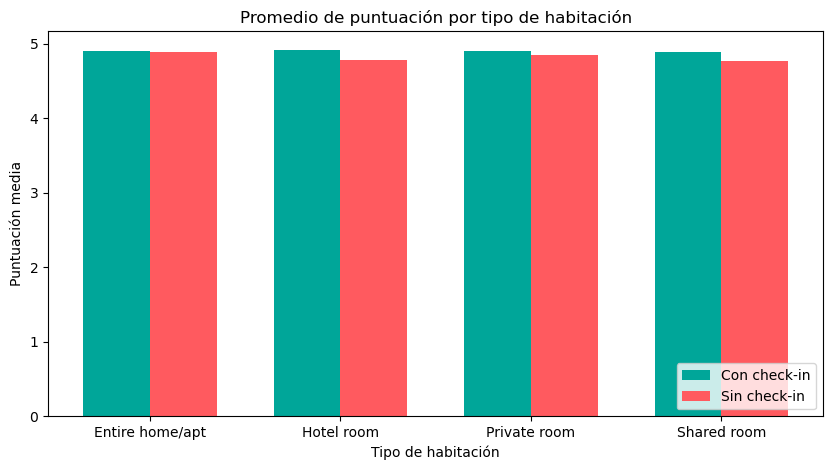

In [17]:
# Lista con el índice de los datos para el eje x
index = room_score_with_checkin.index.astype(str).tolist()

# Ancho de las barras
bar_width = 0.35

# Gráfico de barras con la comparativa en la puntuación media con y sin bienvenido en el check-in
fig, ax = plt.subplots(figsize = (10,5)) # Ajuste del tamaño del gráfico
ax.bar(index, room_score_with_checkin, bar_width, label='Con check-in', color='#00A699')
ax.bar([i + bar_width for i in range(len(index))], room_score_without_checkin, bar_width, label='Sin check-in', color='#FF5A5F')

# Título y etiquetas de los ejes
ax.set_title('Promedio de puntuación por tipo de habitación')
ax.set_xlabel('Tipo de habitación')
ax.set_ylabel('Puntuación media')
ax.legend(loc='lower right')

plt.xticks([i + bar_width / 2 for i in range(len(index))], index) # Ajuste de la posición de las etiquetas del eje x

plt.show()